In [53]:
# loading packages

import os
import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs
import seaborn as sns

# Kmeans, aglomerative clustering algorithm and silhouette_score packages from scikit-learn
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans, AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage # For Ward's linkage criterion
from sklearn.metrics import silhouette_samples,silhouette_score

## Load raw data

In [54]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'countryriskdata.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (122, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          39  1.867  3.822       3.403
1    Algeria     DZ          34  2.213  4.160       4.202
2  Argentina     AR          36  1.957  4.568      -2.298
3    Armenia     AM          33  2.218  4.126       0.208
4  Australia     AU          79  1.465  8.244       2.471


## Simple exploratory analysis
### Print summary statistics
You may want to perform more exploratory analysis to determine which features/variables to include in your analysis.

In [55]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation Matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  122.000000  122.000000  122.000000  122.000000
mean    46.237705    2.003730    5.598861    2.372566
std     19.126397    0.447826    1.487328    3.241424
min     14.000000    1.192000    2.728000  -18.000000
25%     31.250000    1.684750    4.571750    1.432250
50%     40.000000    1.969000    5.274000    2.496000
75%     58.750000    2.280500    6.476750    4.080000
max     90.000000    3.399000    8.633000    7.958000

Correlation Matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.700477  0.923589    0.102513
Peace        -0.700477  1.000000 -0.651961   -0.199855
Legal         0.923589 -0.651961  1.000000    0.123440
GDP Growth    0.102513 -0.199855  0.123440    1.000000


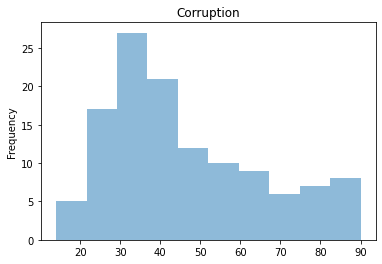

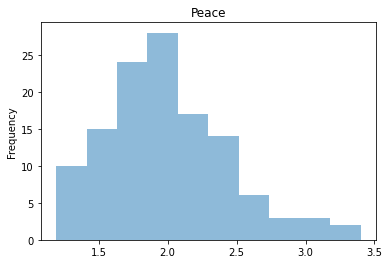

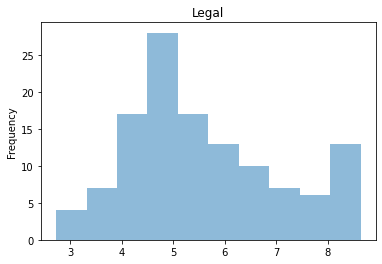

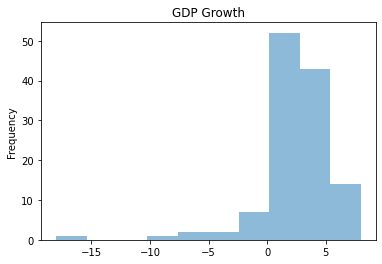

In [56]:
# tests to check for skewness of Data
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

In [57]:
df = raw[['Corruption','Peace', 'Legal', 'GDP Growth']]
df_normalized  = (df - df.mean())/ df.std()

df_normalized.head(5)

,Corruption,Peace,Legal,GDP Growth
0,-0.378414,-0.305319,-1.194666,0.317896
1,-0.639833,0.467304,-0.967413,0.564392
2,-0.535266,-0.104348,-0.693096,-1.440899
3,-0.692117,0.478469,-0.990273,-0.667782
4,1.712936,-1.202990,1.778450,0.030368


### Do some pairwise scatter plots using seaborn

Index(['Corruption', 'Peace', 'Legal', 'GDP Growth'], dtype='object')

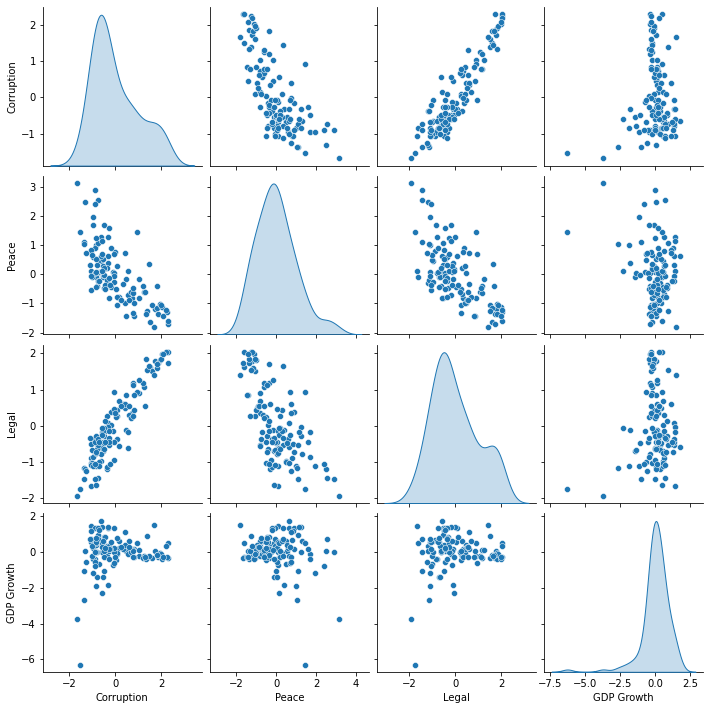

In [58]:
sns.pairplot(df_normalized,vars=df_normalized.columns[0:], diag_kind="kde")
df_normalized.columns[0:]

## K means cluster
The following example forms two clusters using all the features provided.You may consider pre-processing the data, for example, feature selection and transformation. You should also experiment with the number of clusters, and determine how many clusters to form.

Ref. [Feature normalization.](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

Ref. [Determining the number of clusters in a dataset.](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

### K means with k=1 to k=11, printing inertia for each # of clusters

1 483.9999999999998
2 265.9826893535328
3 189.68000937886796
4 155.93376360496808
5 125.89710885274408
6 105.28822649502634
7 91.67125343511606
8 79.99945339781293
9 74.06621934378092
10 68.09696340558818


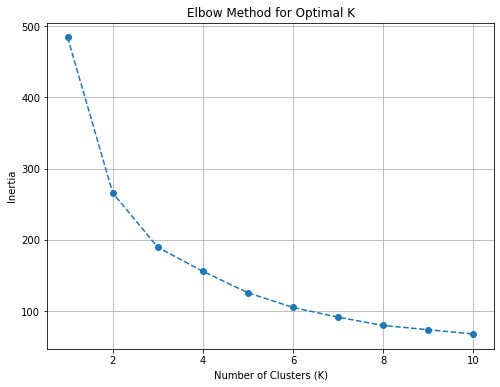

In [59]:
X = df_normalized[['Corruption', 'Peace', 'Legal', 'GDP Growth']]

inertia = []

# Loop through a range of K values and calculate inertia for each K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k) #, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

for k in range(0, 10):
    print(k+1, inertia[k])

    
# Plot the inertia values against the number of clusters (K)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

In [60]:
#Optimal Number of Clusters is 3 using Elbow Method
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at result
y = kmeans.labels_
centers = kmeans.cluster_centers_
print("cluster labels: ", y)

inertia for k=3 is 189.70808794365183
cluster centers:  [[ 1.22629488 -0.97516519  1.16116726  0.01022772]
 [-1.02324752  1.34666395 -1.05468362 -1.71291971]
 [-0.47759982  0.2622277  -0.43331278  0.37198404]]
cluster labels:  [2 2 1 2 0 0 1 2 2 0 2 2 2 0 1 2 1 2 0 1 0 2 2 0 2 2 0 1 0 2 1 2 2 0 2 0 0
 2 2 0 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2 0 1 2 0 2 2 0 2 2 0 2 2 2 2 2
 2 0 0 2 1 0 2 2 2 2 2 2 0 0 0 2 1 2 2 2 2 2 0 0 0 2 0 2 0 0 0 2 2 2 1 2 2
 2 1 0 0 0 0 1 2 1 2 1]


### Visualize the result

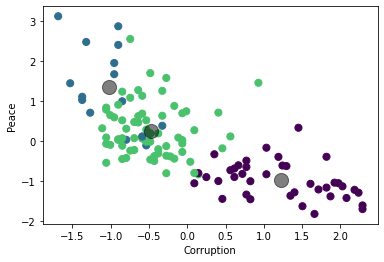

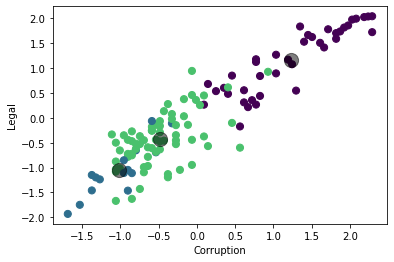

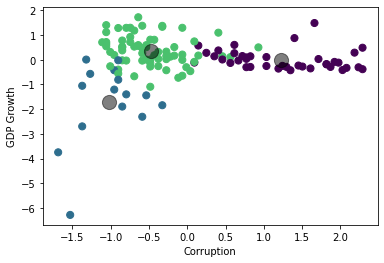

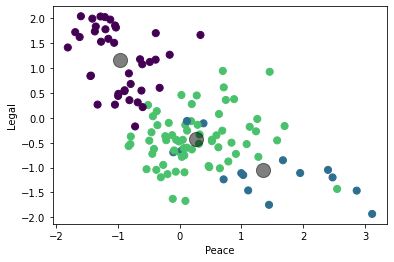

In [61]:
figs = [(0,1), (0,2), (0,3), (1,2)]
labels = ['Corruption', 'Peace', 'Legal', 'GDP Growth']

norm = clrs.Normalize(vmin=0,vmax=y.max()+0.8)
cmap =cm.viridis
for i in range(4):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c = cmap(norm(y)), s =50)
    plt.scatter(centers[:,figs[i][0]], centers[:,figs[i][1]], c = 'black', s= 200, alpha = 0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

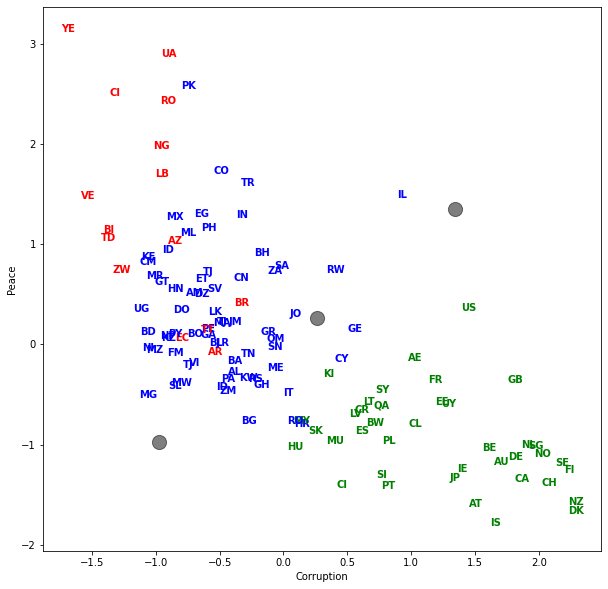

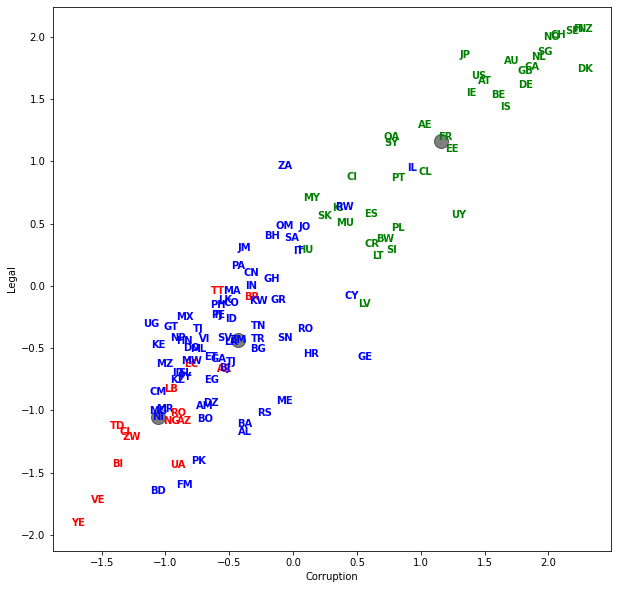

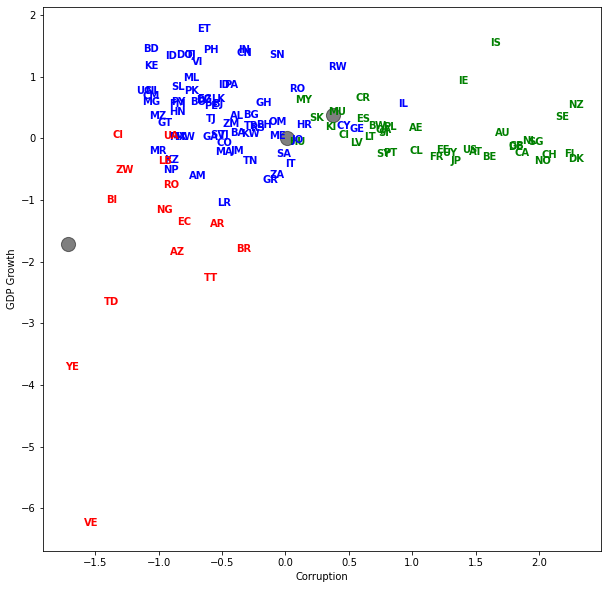

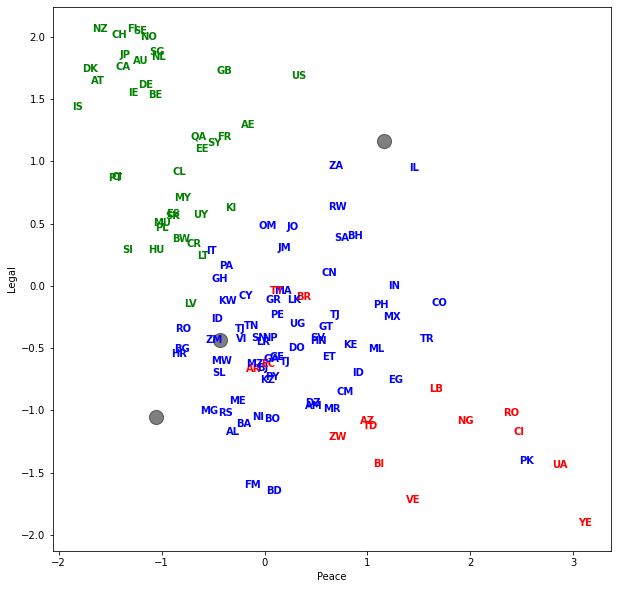

In [62]:
figs = [(0,1), (0,2), (0,3), (1,2)]
labels = ['Corruption', 'Peace', 'Legal', 'GDP Growth']
colours = ['green','red','blue']


for i in range(4):
    fig = plt.figure(i, figsize = (10,10))
    fig_1 = figs[i][0]
    fig_2 = figs[i][1]
    plt.scatter(X.iloc[:,fig_1], X.iloc[:,fig_2], c=y, s=0 , alpha = 0)
    plt.scatter(centers[:,fig_2], centers[:,fig_2], c = 'black', s= 200, alpha = 0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, fig_1], X.iloc[j, fig_2], raw['Abbrev'].iloc[j], color = colours[y[j]], weight ='semibold' , horizontalalignment='center')
                        
    plt.xlabel(labels[fig_1])
    plt.ylabel(labels[fig_2])                 
plt.show()                        

### List the result

Depending on the number of features you choose, you may also consider presenting your result using graphs.

In [63]:
result = pd.DataFrame({'Country': raw['Country'], 'Abbrev': raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
45                        Iceland     IS      0
96                      Singapore     SG      0
44                        Hungary     HU      0
23                     Costa Rica     CR      0
88                          Qatar     QA      0
87                       Portugal     PT      0
26                 Czech Republic     CI      0
86                         Poland     PL      0
20                          Chile     CL      0
28                        Denmark     DK      0
39                        Germany     DE      0
76                    New Zealand     NZ      0
75                    Netherlands     NL      0
33                        Estonia     EE      0
68                      Mauritius     MU      0
35                        Finland     FI      0
36                         France     FR      0
79                         Norway     NO      0
65                       Malaysia     MY      0
97                       Slovakia     SK

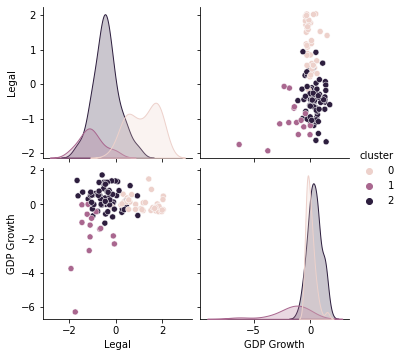

In [64]:
df_normalized["cluster"] = y
sns.pairplot(df_normalized,vars=df_normalized.columns[2:-1],hue="cluster")

For  # of Clusters : 2 The Average Silhouette Score is : 0.42419957148827603
For  # of Clusters : 3 The Average Silhouette Score is : 0.4068222762339574
For  # of Clusters : 4 The Average Silhouette Score is : 0.3646969402367092
For  # of Clusters : 5 The Average Silhouette Score is : 0.30589516060647576
For  # of Clusters : 6 The Average Silhouette Score is : 0.33880159825544914
For  # of Clusters : 7 The Average Silhouette Score is : 0.30394674470927385
For  # of Clusters : 8 The Average Silhouette Score is : 0.3160235180783724
For  # of Clusters : 9 The Average Silhouette Score is : 0.2953702935150043
For  # of Clusters : 10 The Average Silhouette Score is : 0.2885253968002121


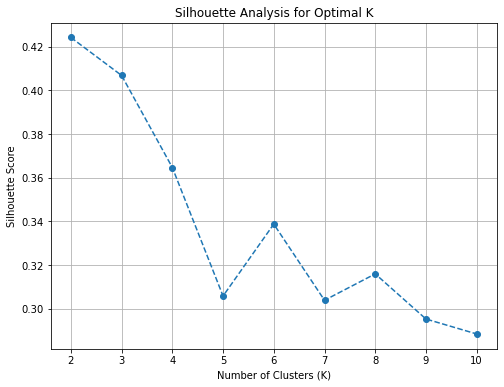

In [65]:
# Silhouette Analysis 
# Initialize list to store silhouette scores
silhouette_scores = []

# Loop through a range of K values and calculate silhouette score for each K
for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For  # of Clusters :" , k, "The Average Silhouette Score is :" , silhouette_avg)
    
# Plot silhouette scores against the number of clusters (K)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.grid()
plt.show()

Cluster 1:
                          Country  Cluster_agg
2                       Argentina            0
6                      Azerbaijan            0
14                         Brazil            0
19                           Chad            0
22                       Colombia            0
27   Democratic Republic of Congo            0
30                        Ecuador            0
60                        Lebanon            0
61                        Liberia            0
69                         Mexico            0
78                        Nigeria            0
81                       Pakistan            0
90                         Russia            0
108           Trinidad and Tobago            0
110                        Turkey            0
112                       Ukraine            0
117                     Venezuela            0
119                         Yemen            0

Cluster 2:
                  Country  Cluster_agg
4               Australia            1
5     

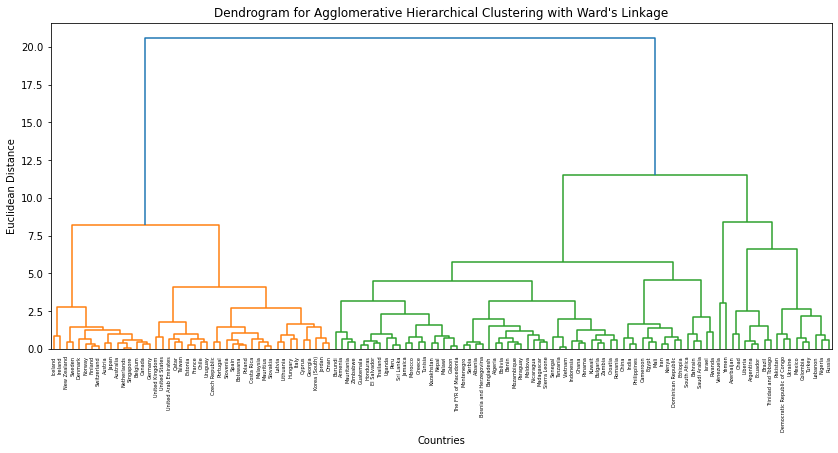

In [66]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = agg_clustering.fit_predict(X)

# Add the cluster labels to the DataFrame
raw['Cluster_agg'] = cluster_labels

# Print the countries in each cluster
for cluster_id in range(3):  # Adjust the number of clusters as needed
    cluster_data = raw[raw['Cluster_agg'] == cluster_id]
    print(f"Cluster {cluster_id + 1}:")
    print(cluster_data[['Country', 'Cluster_agg']])
    print()
    
# Dendrogram for visualization
print()
linkage_matrix = linkage(X, method='ward')
plt.figure(figsize=(14, 6))
dendrogram(linkage_matrix, orientation="top",  labels = raw['Country'].to_list())
plt.title("Dendrogram for Agglomerative Hierarchical Clustering with Ward's Linkage")
plt.xlabel("Countries")
plt.ylabel("Euclidean Distance")
plt.show()